21BCE187 BHARVI PATEL


21BCE186 ARYA PATEL

PSC INNOVATIVE ASSIGNMENT

In [24]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lat=[]
lon=[]
rooms=[]
br=[]
op=[]
hv=[]
with open('house_dataset.csv',mode='w') as csvfile:
    fieldnames=['LONGITUDE','LATITUDE','TOTAL_ROOMS','TOTAL_BEDROOMS','OCEAN_PROXIMITY','HOUSE_VALUE']
    writer=csv.DictWriter(csvfile,fieldnames=fieldnames)
    writer.writeheader()
    a=int(input("How much data u want to enter : "))
    print("Enter longitudes : ")
    for b in range(a):
        c=float(input())
        lon.append(c)
        
    print("Enter latitudes : ")
    for b in range(a):
        c=float(input())
        lat.append(c)
 
    print("Enter total rooms : ")
    for b in range(a):
        c=int(input())
        rooms.append(c)
        
    print("Enter total bedrooms : ")
    for b in range(a):
        c=int(input())
        br.append(c)
        
    print("Enter ocean proximity : ")
    for b in range(a):
        c=input()
        op.append(c)
        
    print("Enter housevalue : ")
    for b in range(a):
        c=float(input())
        hv.append(c)
        
    for b in range(a):
        writer.writerow({"LONGITUDE":lon[b],"LATITUDE":lat[b],"TOTAL_ROOMS":rooms[b],"TOTAL_BEDROOMS":br[b],"OCEAN_PROXIMITY":op[b],"HOUSE_VALUE":hv[b]})

How much data u want to enter : 10
Enter longitudes : 
-122.26
-122.24
-122.5
-122.40
-122.77
123.00
123.10
122.22
-122.22
122.25
Enter latitudes : 
37.84
37.88
37.85
37.75
37.58
37.74
37.48
37.55
37.78
37.57
Enter total rooms : 
880
1074
1023
650
825
941
555
2401
1111
1001
Enter total bedrooms : 
231
254
265
210
245
210
222
221
224
220
Enter ocean proximity : 
AWAY
AWAY
ISLAND
ISLAND
ISLAND
FAR
FAR
FAR
FAR
AWAY
Enter housevalue : 
452110
412550
555555
555412
541263
555000
412250
321456
415263
512634


In [3]:
data=pd.read_csv("house_dataset.csv")

In [4]:
data

,LONGITUDE,LATITUDE,TOTAL_ROOMS,TOTAL_BEDROOMS,OCEAN_PROXIMITY,HOUSE_VALUE
0,-122.26,37.84,880,231,AWAY,452110.0
1,-122.24,37.88,1074,254,AWAY,412550.0
2,-122.50,37.85,1023,265,ISLAND,555555.0
3,-122.40,37.75,650,210,ISLAND,555412.0
4,-122.77,37.58,825,245,ISLAND,541263.0
5,123.00,37.74,941,210,FAR,555000.0
6,123.10,37.48,555,222,FAR,412250.0
7,122.22,37.55,2401,221,FAR,321456.0
8,-122.22,37.78,1111,224,FAR,415263.0
9,122.25,37.57,1001,220,AWAY,512634.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LONGITUDE        10 non-null     float64
 1   LATITUDE         10 non-null     float64
 2   TOTAL_ROOMS      10 non-null     int64  
 3   TOTAL_BEDROOMS   10 non-null     int64  
 4   OCEAN_PROXIMITY  10 non-null     object 
 5   HOUSE_VALUE      10 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 608.0+ bytes


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x=data.drop(['HOUSE_VALUE'],axis=1)
y=data['HOUSE_VALUE']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [9]:
train_data=x_train.join(y_train)

In [10]:
train_data

,LONGITUDE,LATITUDE,TOTAL_ROOMS,TOTAL_BEDROOMS,OCEAN_PROXIMITY,HOUSE_VALUE
3,-122.40,37.75,650,210,ISLAND,555412.0
6,123.10,37.48,555,222,FAR,412250.0
8,-122.22,37.78,1111,224,FAR,415263.0
1,-122.24,37.88,1074,254,AWAY,412550.0
5,123.00,37.74,941,210,FAR,555000.0
2,-122.50,37.85,1023,265,ISLAND,555555.0
0,-122.26,37.84,880,231,AWAY,452110.0
9,122.25,37.57,1001,220,AWAY,512634.0


array([[<AxesSubplot:title={'center':'LONGITUDE'}>,
        <AxesSubplot:title={'center':'LATITUDE'}>],
       [<AxesSubplot:title={'center':'TOTAL_ROOMS'}>,
        <AxesSubplot:title={'center':'TOTAL_BEDROOMS'}>],
       [<AxesSubplot:title={'center':'HOUSE_VALUE'}>, <AxesSubplot:>]],
      dtype=object)

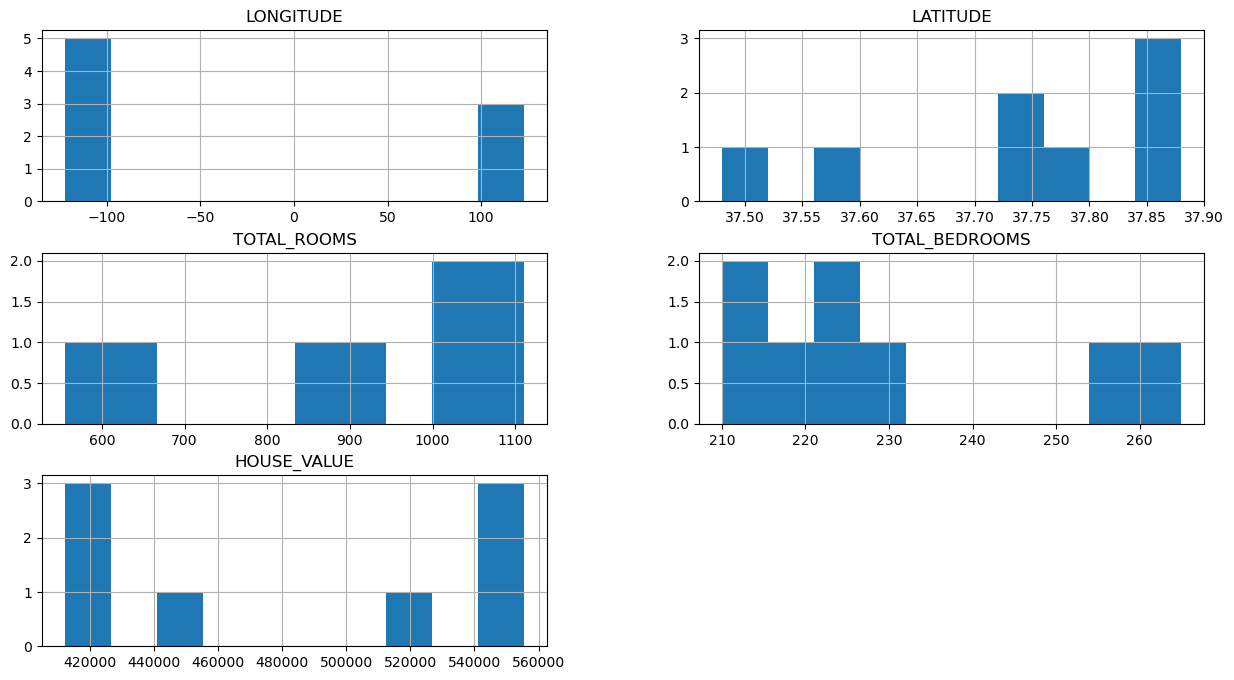

In [11]:
train_data.hist(figsize=(15,8))

In [12]:
train_data.corr()

,LONGITUDE,LATITUDE,TOTAL_ROOMS,TOTAL_BEDROOMS,HOUSE_VALUE
LONGITUDE,1.000000,-0.817852,-0.297072,-0.504012,0.114648
LATITUDE,-0.817852,1.000000,0.575043,0.537557,0.095971
TOTAL_ROOMS,-0.297072,0.575043,1.000000,0.466403,-0.050199
TOTAL_BEDROOMS,-0.504012,0.537557,0.466403,1.000000,-0.146782
HOUSE_VALUE,0.114648,0.095971,-0.050199,-0.146782,1.000000


<AxesSubplot:>

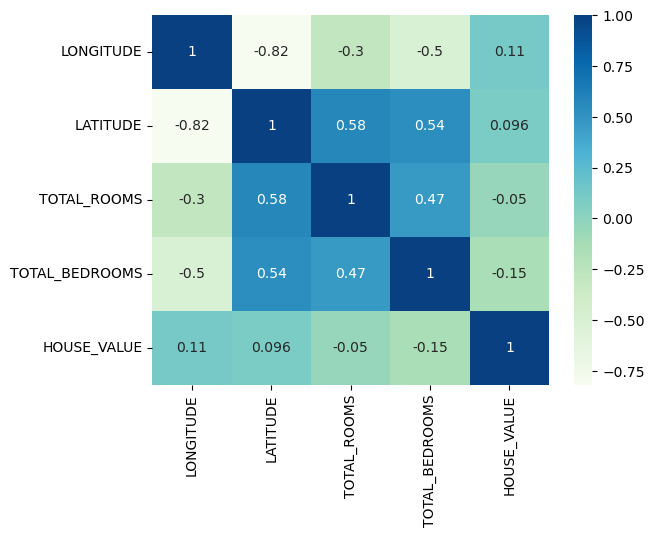

In [13]:
 sns.heatmap(train_data.corr(),annot=True,cmap="GnBu")

In [14]:
train_data.OCEAN_PROXIMITY.value_counts()

FAR       3
AWAY      3
ISLAND    2
Name: OCEAN_PROXIMITY, dtype: int64

In [15]:
pd.get_dummies(train_data.OCEAN_PROXIMITY)

,AWAY,FAR,ISLAND
3,0,0,1
6,0,1,0
8,0,1,0
1,1,0,0
5,0,1,0
2,0,0,1
0,1,0,0
9,1,0,0


In [32]:
train_data.join(pd.get_dummies(train_data.OCEAN_PROXIMITY))

,LONGITUDE,LATITUDE,TOTAL_ROOMS,TOTAL_BEDROOMS,OCEAN_PROXIMITY,HOUSE_VALUE,AWAY,FAR,ISLAND
3,-122.40,37.75,650,210,ISLAND,555412.0,0,0,1
6,123.10,37.48,555,222,FAR,412250.0,0,1,0
8,-122.22,37.78,1111,224,FAR,415263.0,0,1,0
1,-122.24,37.88,1074,254,AWAY,412550.0,1,0,0
5,123.00,37.74,941,210,FAR,555000.0,0,1,0
2,-122.50,37.85,1023,265,ISLAND,555555.0,0,0,1
0,-122.26,37.84,880,231,AWAY,452110.0,1,0,0
9,122.25,37.57,1001,220,AWAY,512634.0,1,0,0


<AxesSubplot:xlabel='LATITUDE', ylabel='LONGITUDE'>

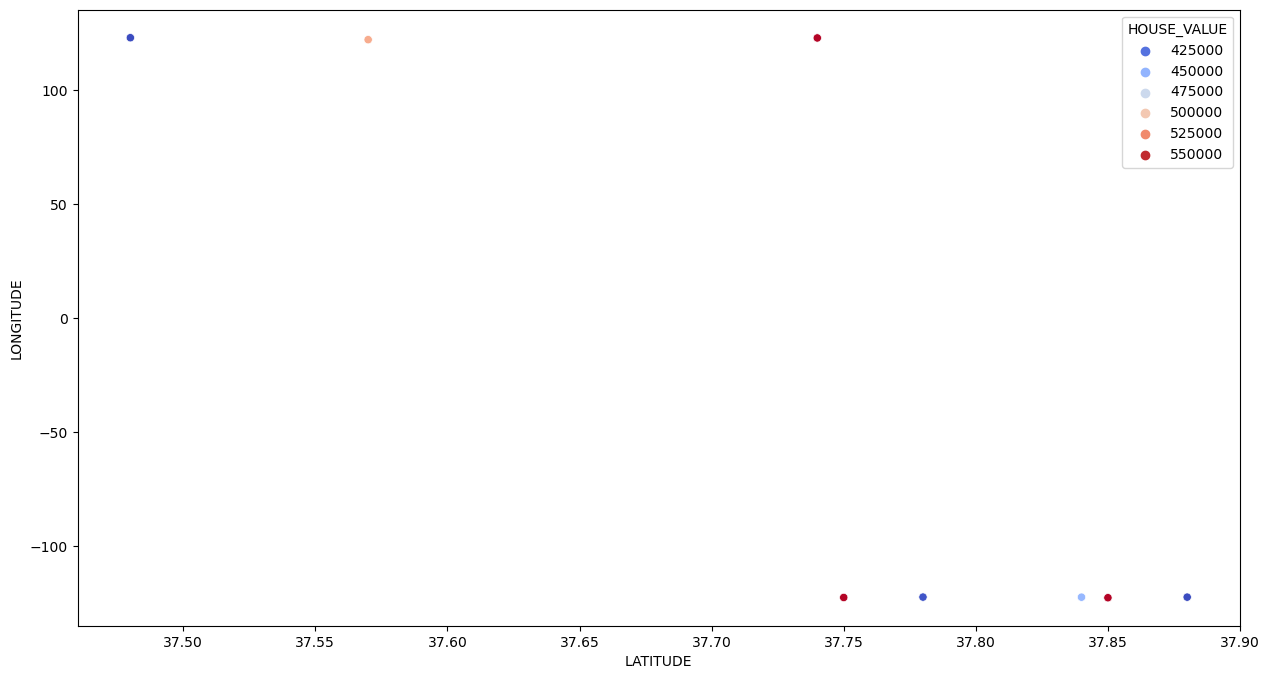

In [35]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='LATITUDE',y='LONGITUDE',data=train_data,hue='HOUSE_VALUE',palette='coolwarm')
